# 0.1 Dataset

we will use a dataset which has information about students admitted to an engineering college in India. Information about each student includes the performance in school exams, family income, rank in screening examination, etc. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.width', 200)
#pd.set_option('display.max_columns', 20)

# load the dataset
df = pd.read_csv('data/student_v1.csv')

In [2]:
print('Shape of dataset:', df.shape)

Shape of dataset: (535, 13)


In [3]:
df.head()

,Admn Yr,Seat Type,Entrance Rank,Reference,Sex,Proposed Residence,Board,Matriculation,Family Income,Physics,Chemistry,Maths,No of Subjects Failed
0,2010,NRI,22799.0,N,Male,Hostler,CBSE,444.0,5000000.0,88.0,88.0,81.0,4
1,2010,MANAGEMENT SEAT,31582.0,N,Male,Day Scholar,CBSE,396.0,1000000.0,72.0,79.0,69.0,3
2,2010,GENERAL,5158.0,N,Male,Day Scholar,HSC,1175.0,350000.0,193.0,196.0,192.0,1
3,2010,GENERAL,5883.0,N,Male,Hostler,HSC,1135.0,600000.0,185.0,184.0,198.0,0
4,2010,FEE WAIVER,6293.0,N,Male,Hostler,ISC,404.0,120000.0,80.0,74.0,90.0,3


Below, we've included a description of each of the columns in the dataset:

    Admn Yr - The year of admission in the college
    Seat Type - Students are admitted to nine different type of seats broadly classified on the basis of merit and fee structure
    Entrance Rank - Rank secured in a common examination to measure academic merit of the student
    Reference - Whether the student was recommended by the management of the college
    Board - Board under which the student studied in school. Three different types exists in the data set.
    Physics - Marks secured in Physics
    Chemistry - Marks secured in Chemistry
    Maths - Marks secured in Maths
    Matriculation - Total marks secured in the final school exam.
    Sex - Male / Female
    Family Income - Annual Income of the family in Indian Rupee (INR)
    Proposed Residence - Whether the student resides on-campus or off-campus. Day scholar / Hostler
    No of Subjects Failed - The number of subjects the student failed in the college. This is the target variable.

#### types of variables

The numeric variables are:

    Entrance Rank
    Matriculation
    Family Income
    Physics
    Chemistry
    Maths

The categorical variables are:

    Admn Yr
    Seat Type
    Reference
    Sex
    Proposed Residence
    Board

Note: Some variables such as year can be treated as a numerical or categorical variable depending on the dataset or domain. In our case, we know that the dataset focuses on examinations, etc which is different from year to year. For example, students with admission year 2010 would all give the same exam, and students with admission year 2011 would all give a different exam. Hence, we treat Admn Yr as a categorical variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Admn Yr                535 non-null    int64  
 1   Seat Type              535 non-null    object 
 2   Entrance Rank          530 non-null    float64
 3   Reference              535 non-null    object 
 4   Sex                    535 non-null    object 
 5   Proposed Residence     519 non-null    object 
 6   Board                  535 non-null    object 
 7   Matriculation          532 non-null    float64
 8   Family Income          518 non-null    float64
 9   Physics                532 non-null    float64
 10  Chemistry              530 non-null    float64
 11  Maths                  531 non-null    float64
 12  No of Subjects Failed  535 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 54.5+ KB


The categorical variables are currently of datatype object. Let's set it them to be of category datatype instead. (We can also see that many variables have missing values (null values), but we'll get back to that in a bit.)

In [5]:
categorical_labels = ['Admn Yr', 'Seat Type', 'Reference', 'Sex', 'Proposed Residence', 'Board']
df.loc[:, categorical_labels] = df.loc[:, categorical_labels].astype('category')
# Check that everything looks good
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Admn Yr                535 non-null    category
 1   Seat Type              535 non-null    category
 2   Entrance Rank          530 non-null    float64 
 3   Reference              535 non-null    category
 4   Sex                    535 non-null    category
 5   Proposed Residence     519 non-null    category
 6   Board                  535 non-null    category
 7   Matriculation          532 non-null    float64 
 8   Family Income          518 non-null    float64 
 9   Physics                532 non-null    float64 
 10  Chemistry              530 non-null    float64 
 11  Maths                  531 non-null    float64 
 12  No of Subjects Failed  535 non-null    int64   
dtypes: category(6), float64(6), int64(1)
memory usage: 33.5 KB


#### Duplicate Observations

In [6]:
print('No of duplicates present:', df.duplicated().sum())
df = df.drop_duplicates()
# reset index.
df = df.reset_index(drop=True)
print('Shape:', df.shape)

No of duplicates present: 54
Shape: (481, 13)


54 duplicates were present in the dataset. After dropping them, we are now left with 481 observations.

#### Distribution of Variables

When analyzing the distribution of variables, we analyze numerical and categorical variables separately. This is because measures like mean, standard deviation, etc do not mean anything for categorical variables.

#### Categorical Variables

In [8]:
print(df.describe(include='category'))

        Admn Yr        Seat Type Reference   Sex Proposed Residence Board
count       481              481       481   481                465   481
unique        4                9         2     2                  2     3
top        2012  MANAGEMENT SEAT         N  Male        Day Scholar   HSC
freq        125              185       470   477                268   255


Since the number of unique values for each variable is quite small (less than 10), the easiest way to look at the data is to plot barplots. 

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


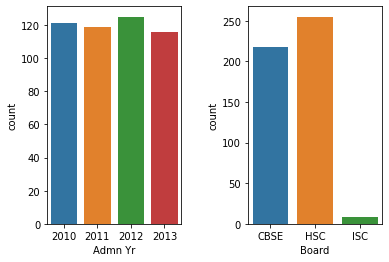

In [16]:
# bar graph of Admn Yr and Board
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
sns.countplot(df['Admn Yr'])
plt.subplot(1, 2, 2)
sns.countplot(df['Board'])
plt.show()

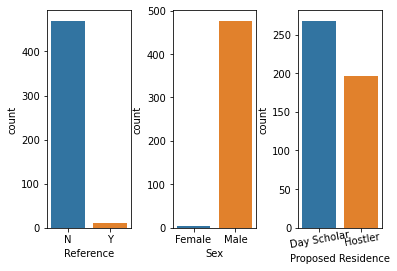

In [17]:
# bar graph of Reference, Sex and Proposed Residence
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 3, 1)
sns.countplot(df['Reference'])
plt.subplot(1, 3, 2)
sns.countplot(df['Sex'])
plt.subplot(1, 3, 3)
sns.countplot(df['Proposed Residence'])
# rotate x-axis labels because they don't fit otherwise
plt.xticks(rotation=10, wrap=True)
plt.show()

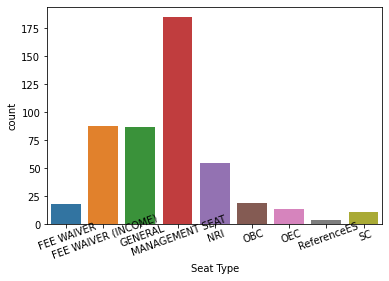

In [18]:
# bar graph of Seat Type
plt.figure()
sns.countplot(df['Seat Type'])
# rotate x-axis labels because they don't fit otherwise
plt.xticks(rotation=20, wrap=True)
plt.show()

From the above plots, we can make the following observations:

    The number of students is almost equal for each Admn Yr, as one might expect.
    More than 95% of the students come from HSC or CBSE schools.
    For the variables Reference and Sex, all but a few observations belong to only one class. That is, very few students provided a reference, and the college has a very skewed gender ratio.

#### Numerical Variables

In [19]:
print(df.describe())

       Entrance Rank  Matriculation  Family Income     Physics   Chemistry  \
count     476.000000     478.000000   4.650000e+02  478.000000  476.000000   
mean    24138.768908     736.643054   4.521136e+05  128.983264  129.441176   
std     15786.489338     343.066274   5.008878e+05   48.140645   50.403495   
min      2750.000000      64.600000   1.200000e+04   49.000000   45.000000   
25%     11466.000000     418.000000   1.200000e+05   83.000000   82.000000   
50%     19631.000000     782.000000   3.000000e+05  126.500000  135.000000   
75%     31937.500000    1085.000000   6.000000e+05  179.000000  181.000000   
max     75012.000000    1194.000000   5.000000e+06  200.000000  200.000000   

            Maths  No of Subjects Failed  
count  477.000000             481.000000  
mean   125.582809               1.910603  
std     52.358131               1.555338  
min     33.000000               0.000000  
25%     80.000000               0.000000  
50%    116.000000               2.00000

If we pay attention to the minimum and maximum values for all the variables, the only thing that seems to stand out is that the maximum values for Physics, Chemistry and Maths is 200 — as opposed to 100, which is what we might expect in general.

The other values look fine — for example, the worst Entrance Rank is about 75000, which seems reasonable, and the maximum Family Income is 50,00,000 INR. But the table is quite difficult to look at, to let's just draw some histograms.

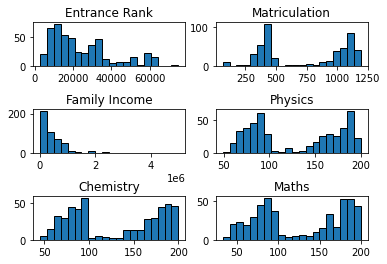

In [20]:
plt.subplots_adjust(hspace=1)

plt.subplot(3, 2, 1)
plt.hist(df['Entrance Rank'], ec='black', bins=20)
plt.title("Entrance Rank")

plt.subplot(3, 2, 2)
plt.hist(df['Matriculation'], ec='black', bins=20)
plt.title('Matriculation')

plt.subplot(3, 2, 3)
plt.hist(df['Family Income'], ec='black', bins=20)
plt.title('Family Income')

plt.subplot(3, 2, 4)
plt.hist(df['Physics'], ec='black', bins=20)
plt.title('Physics')

plt.subplot(3, 2, 5)
plt.hist(df['Chemistry'], ec='black', bins=20)
plt.title('Chemistry')

plt.subplot(3, 2, 6)
plt.hist(df['Maths'], ec='black', bins=20)
plt.title('Maths')

plt.show()

A lot of those plots have multiple modes. Moreover, sometimes these modes are separated by a pretty significant gap. Anytime we see multiple modes, it's important to reason about why this might be happening.

    We can see that Entrance Rank has trimodal distribution, while Matriculation, Physics, Chemistry and Maths has a bimodal distribution. In particular, for the subjects (Chemistry, Physics and Maths), the first mode seems to end at 100, and the next mode ends at 200. This is a strong hint that different students gave different exams, one of which had a maximum score of 100 per subject, and the other had a maximum score of 200 per subject. We should analyze this more and confirm if this is indeed the case.
    Family Income is extremely right skewed, which is consistent with regular income distribution.

#### Bimodal Distributions (Matriculation, Physics, Chemistry, Maths)

We noted a couple of other things earlier:

    For the subjects (Chemistry, Physics and Maths), the first mode seems to end at 100, and the next mode ends at 200. Hence, it is quite probable that the students gave different exams, one of which had a maximum score of 100 per subject, and the other had a maximum score of 200 per subject.
    We saw in the plots for categorical variable Board that 90% of the students come from HSC and CBSE schools. So, it is likely that in the bimodal distributions, one of the modes corresponds to CBSE and the other mode corresponds to HSC. That is, one of CBSE and HSC has maximum marks 100 per subject (Physics, Chemistry and Maths), and the other has maximum marks 200 per subject.
    Similarly, the two boards probably have different maximum total marks for Matriculation. 

Let's see if we can confirm this idea.

Let's plot the boxplots for Matriculation, Physics, Chemistry and Maths grouped by Board.

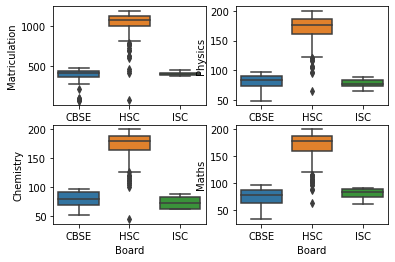

In [21]:
plt.subplot(2, 2, 1)
sns.boxplot(x='Board', y='Matriculation', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Board', y='Physics', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Board', y='Chemistry', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Board', y='Maths', data=df)
plt.show()

We can see that Matriculation, Physics, Chemistry and Maths from HSC and CBSE differ significantly.

    We can clearly see that the maximum marks is 200 per subject for HSC and 100 per subject for CBSE.
    ISC board has fewer data points, but we can still see that ISC's behavior is similar to CBSE's.
    For Matriculation, the maximum mark is 1200 for HSC and 500 for CBSE and ISC.

Let's also plot histograms. We'll split the data by Board first. 

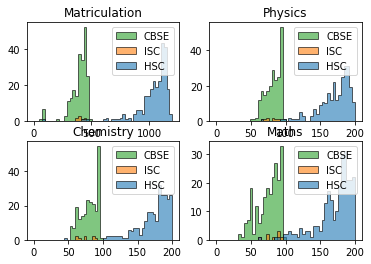

In [22]:
# extract data for each board into a separate data frame
hsc_data  = df[df['Board'] == 'HSC']
isc_data  = df[df['Board'] == 'ISC']
cbse_data = df[df['Board'] == 'CBSE']
labels = ['HSC', 'ISC', 'CBSE']

plt.subplots_adjust(hspace=0.2)

# histogram for Matriculation
plt.subplot(2, 2, 1)
data = [hsc_data['Matriculation'], isc_data['Matriculation'], cbse_data['Matriculation']]
plt.hist(data, label=labels, alpha=0.6, ec='black', histtype='stepfilled', bins=50, range=(0,1200))
plt.legend(loc='upper right')
plt.title('Matriculation')

# histogram for Physics
plt.subplot(2, 2, 2)
data = [hsc_data['Physics'], isc_data['Physics'], cbse_data['Physics']]
plt.hist(data, label=labels, alpha=0.6, ec='black', histtype='stepfilled', bins=50, range=(0,200))
plt.legend(loc='upper right')
plt.title('Physics')

# histogram for Chemistry
plt.subplot(2, 2, 3)
data = [hsc_data['Chemistry'], isc_data['Chemistry'], cbse_data['Chemistry']]
plt.hist(data, label=labels, alpha=0.6, ec='black', histtype='stepfilled', bins=50, range=(0,200))
plt.legend(loc='upper right')
plt.title('Chemistry')

# histogram for Maths
plt.subplot(2, 2, 4)
data = [hsc_data['Maths'], isc_data['Maths'], cbse_data['Maths']]
plt.hist(data, label=labels, alpha=0.6, ec='black', histtype='stepfilled', bins=50, range=(0,200))
plt.legend(loc='upper right')
plt.title('Maths')

plt.show()

The histograms once again clearly confirms our idea.

#### Trimodal distribution (Entrance Rank)

Now, let's see what can explain the trimodal distribution for Entrance Rank. In contrast to Matriculation, Physics, etc which were related to the students school examination results, the Entrance Rank is related to the admission of the student into the university. Out of our other variables, the other variables related to student's admission into the university are Seat Type and Admn Yr.

So, our best guess would be, admission is easier / tougher into the college, based on how much fees the student is paying. Seat Type does have information about that, since there are GENERAL seats, FEE WAIVER seats, NRI (non-residential Indian) seats, etc.

Let's do the same thing we did before — plot boxplots and histograms — but this time for Entrance Rank with Seat Type.

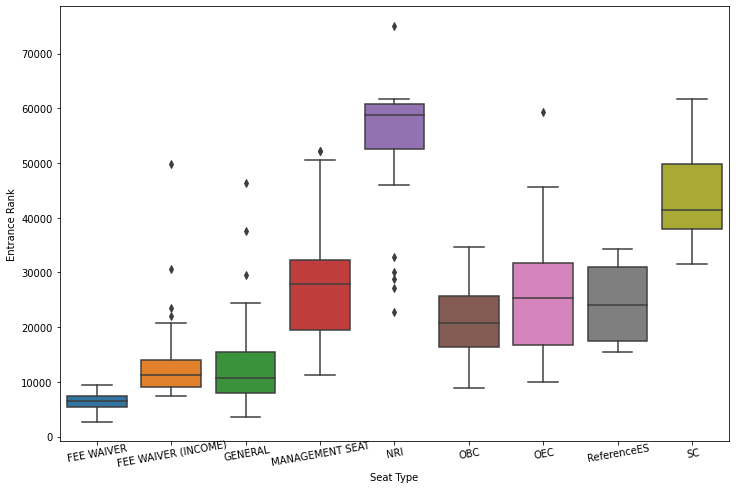

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Seat Type', y='Entrance Rank', data=df)
plt.xticks(rotation=10, wrap=True)
plt.show()

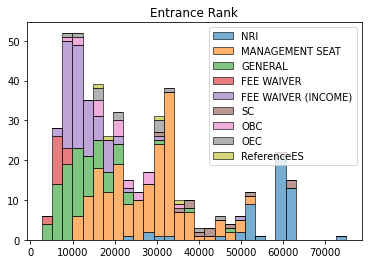

In [24]:
# list of possible values for seat type
seat_types = df['Seat Type'].unique()

# extract data for each seat type
data = []
for seat_type in seat_types:
    data.append(df[df['Seat Type'] == seat_type]['Entrance Rank'])

# histogram for entrance rank
plt.hist(data, label=seat_types, histtype='barstacked', alpha=0.6, ec='black', bins=30)

# add legend and title
plt.legend(loc='upper right')
plt.title('Entrance Rank')

plt.show()

It is evident from the boxplot and histogram that multiple distributions exist in Entrance Rank. From the above plots, we can make the following observations:

    FEE WAIVER, FEE WAIVER (INCOME) and GENERAL together form one mode.
    MANAGEMENT SEAT together forms the second mode. Although OBC, OEC and ReferenceES have very few data points, they seem to behave similar to MANAGEMENT SEAT.
    NRI forms the third mode. Although SC has very few data points, it seems to behave similar to NRI.

#### Numerical Variable Transformations

As part of data cleaning, we need to transform variables into a more usable form for data science and machine learning. 

##### Log transformation

When doing data exploration for numerical variables, we saw that Entrance Rank and Family Income have very skewed distributions.

Let's apply a log transformation to the these variables to reduce the skew.

In [25]:
df['Family Income'] = np.log(df['Family Income'])
df['Entrance Rank'] = np.log(df['Entrance Rank'])
print(df.head())

  Admn Yr        Seat Type  Entrance Rank Reference   Sex Proposed Residence  \
0    2010              NRI      10.034472         N  Male            Hostler   
1    2010  MANAGEMENT SEAT      10.360343         N  Male        Day Scholar   
2    2010          GENERAL       8.548304         N  Male        Day Scholar   
3    2010          GENERAL       8.679822         N  Male            Hostler   
4    2010       FEE WAIVER       8.747193         N  Male            Hostler   

  Board  Matriculation  Family Income  Physics  Chemistry  Maths  \
0  CBSE          444.0      15.424948     88.0       88.0   81.0   
1  CBSE          396.0      13.815511     72.0       79.0   69.0   
2   HSC         1175.0      12.765688    193.0      196.0  192.0   
3   HSC         1135.0      13.304685    185.0      184.0  198.0   
4   ISC          404.0      11.695247     80.0       74.0   90.0   

   No of Subjects Failed  
0                      4  
1                      3  
2                      1  
3 

Text(0.5, 1.0, 'Family Income')

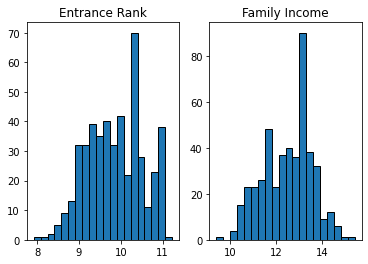

In [26]:
plt.subplots_adjust(hspace=1)
plt.subplot(1, 2, 1)
plt.hist(df['Entrance Rank'], ec='black', bins=20)
plt.title("Entrance Rank")

plt.subplot(1, 2, 2)
plt.hist(df['Family Income'], ec='black', bins=20)
plt.title('Family Income')

##### Percentage Transformation

We saw during our bimodal analysis that students from Board - CBSE and ISC have maximum mark of 500 for Matriculation while HSC board students have maximum marks of 1200.

Similarly, for Physics, Chemistry and Maths, we noticed that the maximum marks is 100 for CBSE and ISC and 200 for HSC.

Since the maximum marks differ by Board, we should rescale the values so that all the grades are percentage values (that is, scale it as if all examinations had a maximum possible score of 100).

In [27]:
# Convert Matriculation to percentage based on Board
df['Matriculation'] = np.where(df['Board'] == 'HSC', df['Matriculation']/12, df['Matriculation'])
df['Matriculation'] = np.where(df['Board'] == 'CBSE', df['Matriculation']/5, df['Matriculation'])
df['Matriculation'] = np.where(df['Board'] == 'ISC',  df['Matriculation']/5, df['Matriculation'])

# Convert Physics, Chemistry and Maths of HSC to percentage
# Marks of other boards are already in percentage
df['Physics']   = np.where(df['Board'] == 'HSC', df['Physics']/2, df['Physics'])
df['Chemistry'] = np.where(df['Board'] == 'HSC', df['Chemistry']/2, df['Chemistry'])
df['Maths']     = np.where(df['Board'] == 'HSC', df['Maths']/2, df['Maths'])
print(df.head())

  Admn Yr        Seat Type  Entrance Rank Reference   Sex Proposed Residence  \
0    2010              NRI      10.034472         N  Male            Hostler   
1    2010  MANAGEMENT SEAT      10.360343         N  Male        Day Scholar   
2    2010          GENERAL       8.548304         N  Male        Day Scholar   
3    2010          GENERAL       8.679822         N  Male            Hostler   
4    2010       FEE WAIVER       8.747193         N  Male            Hostler   

  Board  Matriculation  Family Income  Physics  Chemistry  Maths  \
0  CBSE      88.800000      15.424948     88.0       88.0   81.0   
1  CBSE      79.200000      13.815511     72.0       79.0   69.0   
2   HSC      97.916667      12.765688     96.5       98.0   96.0   
3   HSC      94.583333      13.304685     92.5       92.0   99.0   
4   ISC      80.800000      11.695247     80.0       74.0   90.0   

   No of Subjects Failed  
0                      4  
1                      3  
2                      1  
3 

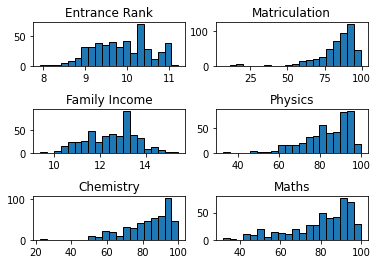

In [28]:
plt.subplots_adjust(hspace=1)

plt.subplot(3, 2, 1)
plt.hist(df['Entrance Rank'], ec='black', bins=20)
plt.title("Entrance Rank")

plt.subplot(3, 2, 2)
plt.hist(df['Matriculation'], ec='black', bins=20)
plt.title('Matriculation')

plt.subplot(3, 2, 3)
plt.hist(df['Family Income'], ec='black', bins=20)
plt.title('Family Income')

plt.subplot(3, 2, 4)
plt.hist(df['Physics'], ec='black', bins=20)
plt.title('Physics')

plt.subplot(3, 2, 5)
plt.hist(df['Chemistry'], ec='black', bins=20)
plt.title('Chemistry')

plt.subplot(3, 2, 6)
plt.hist(df['Maths'], ec='black', bins=20)
plt.title('Maths')

plt.show()

##### Data Re-scaling: Standardization

Many machine learning algorithms require numerical data to be re-scaled before fitting the model (especially important for distance based algorithms). Re-scaling also ensures variables with high magnitude don't dominate the data analysis.

For rescaling, we will perform standardization — that is, re-scale each variable so that its new mean becomes 0 (μ = 0) and standard deviation becomes 1 (σ = 1).

We'll use sklearn library's preprocessing.scale() function to perform standardization:

In [29]:
# numeric variable names stored as a list
numerical_labels = ['Entrance Rank', 'Matriculation', 'Family Income', 'Physics', 'Chemistry', 'Maths']

# standardize data using preprocessing.scale()
from sklearn import preprocessing
df.loc[:,numerical_labels] = preprocessing.scale(df.loc[:,numerical_labels])

# check first five observations
print(df.head())

# check last mean is 0 and std 1
print(df.describe())

  Admn Yr        Seat Type  Entrance Rank Reference   Sex Proposed Residence  \
0    2010              NRI       0.234693         N  Male            Hostler   
1    2010  MANAGEMENT SEAT       0.721673         N  Male        Day Scholar   
2    2010          GENERAL      -1.986232         N  Male        Day Scholar   
3    2010          GENERAL      -1.789692         N  Male            Hostler   
4    2010       FEE WAIVER      -1.689012         N  Male            Hostler   

  Board  Matriculation  Family Income   Physics  Chemistry     Maths  \
0  CBSE       0.419847       2.709531  0.400809   0.378708  0.041068   
1  CBSE      -0.258207       1.215121 -1.038679  -0.339480 -0.743820   
2   HSC       1.063763       0.240330  1.165538   1.176695  1.022178   
3   HSC       0.828328       0.740804  0.805666   0.697903  1.218400   
4   ISC      -0.145198      -0.753607 -0.318935  -0.738473  0.629734   

   No of Subjects Failed  
0                      4  
1                      3  
2    

Since floating-point operations are only precise to a certain number of digits, the new means won't be exactly 0, but they'll be really small (about 10-15).

We can also plot the histograms again, to see the effect of standardization.

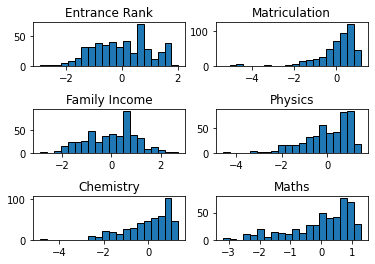

In [30]:
plt.subplots_adjust(hspace=1)

plt.subplot(3, 2, 1)
plt.hist(df['Entrance Rank'], ec='black', bins=20)
plt.title("Entrance Rank")

plt.subplot(3, 2, 2)
plt.hist(df['Matriculation'], ec='black', bins=20)
plt.title('Matriculation')

plt.subplot(3, 2, 3)
plt.hist(df['Family Income'], ec='black', bins=20)
plt.title('Family Income')

plt.subplot(3, 2, 4)
plt.hist(df['Physics'], ec='black', bins=20)
plt.title('Physics')

plt.subplot(3, 2, 5)
plt.hist(df['Chemistry'], ec='black', bins=20)
plt.title('Chemistry')

plt.subplot(3, 2, 6)
plt.hist(df['Maths'], ec='black', bins=20)
plt.title('Maths')

plt.show()

##### Missing Values

Next, we'll check for missing values. We'll also need to decide how we would like to deal with missing values. Common methods for dealing with missing values are:

    Deleting the observations with missing values.
    Imputing the missing values by median/mode, kNN etc.

###### Checking for missing values

In [35]:
print('Data set shape: ', df.shape)
# missing values
print(df.isnull().sum())

Data set shape:  (481, 13)
Admn Yr                   0
Seat Type                 0
Entrance Rank             5
Reference                 0
Sex                       0
Proposed Residence       16
Board                     0
Matriculation             3
Family Income            16
Physics                   3
Chemistry                 5
Maths                     4
No of Subjects Failed     0
dtype: int64


seven variables have missing values. The number of missing values are listed to the right of the corresponding variable in the above output. We have missing values for 6 numerical variables and 1 categorical variable.

##### Dealing with missing values

The simplest approach is to delete the observations which have missing values. However, in doing so, we don't want to end up deleting a significant fraction of our data, since that would be harmful for any further analysis or machine learning.

Let's see how much our dataset would reduce by if we deleted observations which have missing values:

In [36]:
print('Data set shape before dropping missing values:', df.shape)
print('Data set shape after dropping missing values:', df.dropna().shape)

Data set shape before dropping missing values: (481, 13)
Data set shape after dropping missing values: (441, 13)


This would result in dropping 40 observations, which is about 8% of our datasize. That isn't too bad, but it isn't ideal either.

Let's impute the missing values instead. 

##### Imputing missing values

Imputation by Median / Mode

We can impute the missing values of numerical variables by its median. For categorical variables, missing values are imputed by mode.

fill missing values with median for numerical values :    

fill missing values with mode for categorical values :   

#### Imputation by Median / Mode of Subgroup

We can impute with median/mode of a subgroup with respect to few selected variables. If the data values of a variable are known to depend upon some other variables in the dataset, this method of imputation is ideal. The code for imputation of numerical variables by median grouped by Seat Type and mode of categorical variables grouped by Seat Type is :

#### kNN Imputation

The missing values of a variable may be imputed using kNN. kNN finds the corresponding values of its nearest k neighbors by some distance function and imputes those values. We will discuss more about kNN imputation after one hot encoding categorical variables, which is a recommended step before kNN. 

#### Recommended treatment for missing values

Our dataset too suffer from missing values. The missing value exist in 6 numerical variables namely, Entrance Rank, Family Income, Matriculation, Physics, Chemistry and Maths. It is known that these variables are highly correlated to the variable Seat Type. By plotting boxplot grouped by Seat Type helps verify our assumption.

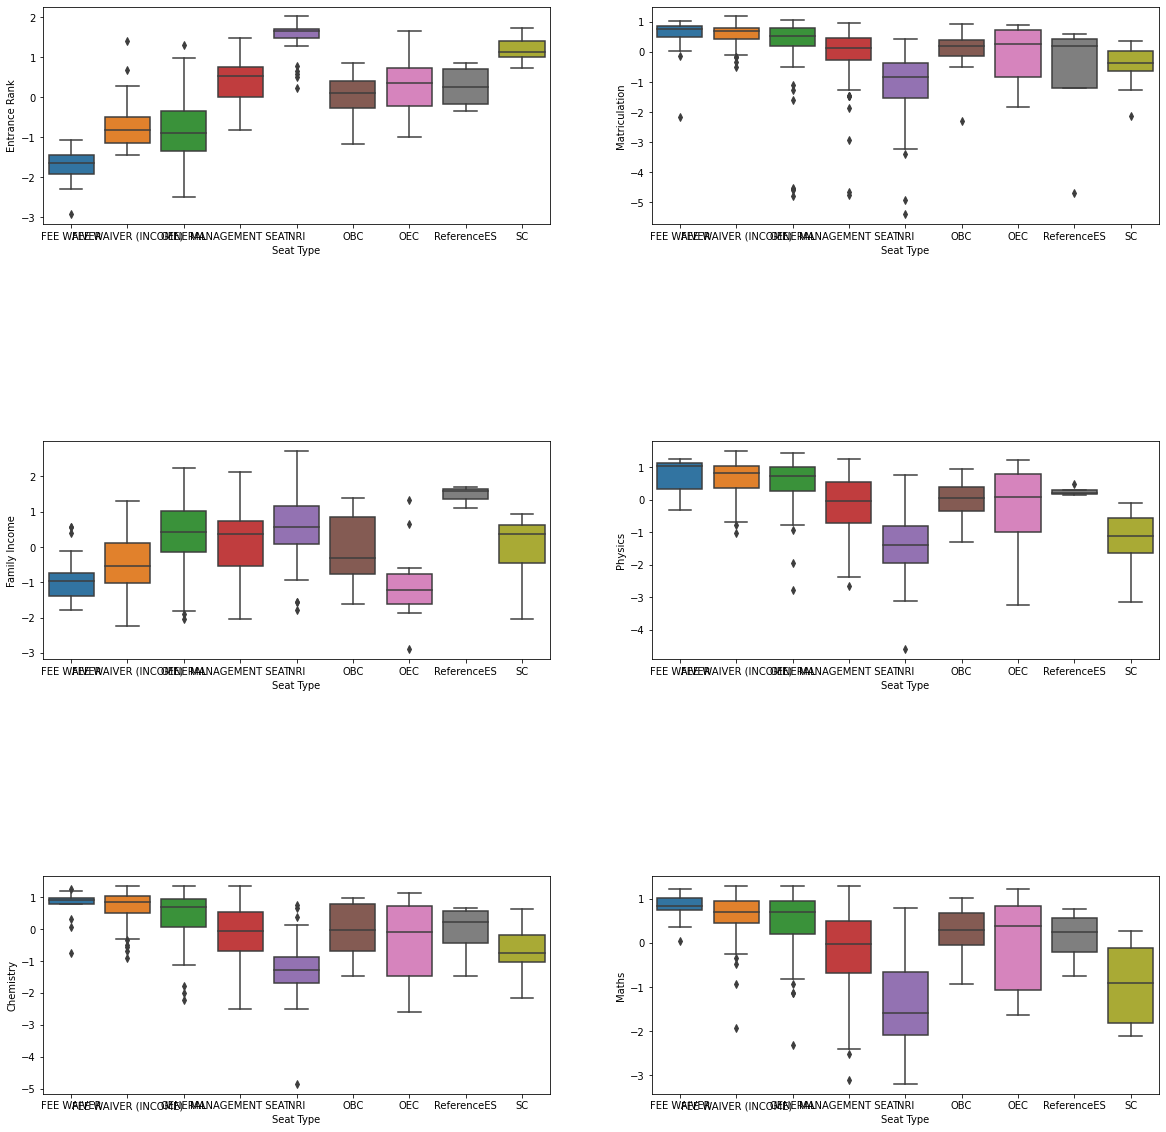

In [92]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1)

plt.subplot(3, 2, 1)
sns.boxplot(x='Seat Type', y='Entrance Rank',data=df)

plt.subplot(3, 2, 2)
sns.boxplot(x='Seat Type', y='Matriculation',data=df)

plt.subplot(3, 2, 3)
sns.boxplot(x='Seat Type', y='Family Income',data=df)

plt.subplot(3, 2, 4)
sns.boxplot(x='Seat Type', y='Physics',data=df)

plt.subplot(3, 2, 5)
sns.boxplot(x='Seat Type', y='Chemistry',data=df)

plt.subplot(3, 2, 6)
sns.boxplot(x='Seat Type', y='Maths',data=df)

plt.show()

In [95]:
numerical_labels, categorical_labels

(['Entrance Rank',
  'Matriculation',
  'Family Income',
  'Physics',
  'Chemistry',
  'Maths'],
 ['Admn Yr', 'Seat Type', 'Reference', 'Sex', 'Proposed Residence', 'Board'])

Therefore, for all numerical variables, missing values are imputed by median grouped by Seat Type.

In [96]:
for var in numerical_labels:
    missing = df[var].isnull()
    df.loc[missing, [var]] = df.groupby('Seat Type')[var].transform('median')

The categorical variable Proposed Residence also contain missing values, which can be imputed by mode grouped by Seat Type.

In [97]:
#categoric variable Proposed Residence imputed by mode of subgroup Seat Type
missing = df['Proposed Residence'].isnull()
df.loc[missing, ['Proposed Residence']] = df.groupby('Seat Type')['Proposed Residence'].transform(lambda S: S.mode()[0])

#### Final check

In [98]:
df.isnull().sum()

Admn Yr                  0
Seat Type                0
Entrance Rank            0
Reference                0
Sex                      0
Proposed Residence       0
Board                    0
Matriculation            0
Family Income            0
Physics                  0
Chemistry                0
Maths                    0
No of Subjects Failed    0
dtype: int64

# Outliers

An outlier is an observation that appears far away and diverges from the overall pattern of the data set. Outliers need close attention — otherwise they can result in wildly wrong estimations. 

Let's see this with a simple example. Suppose we have a sample data set of 10 numbers: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

The mean for the above data is 5.5.

Now let's replace the number 10 with 1000. So the new data set will be: 1, 2, 3, 4, 5, 6, 7, 8, 9, 1000.

The mean is 104.5.

As you can see, having a single outlier had a significant effect on the mean value, which results in wrong estimation of the distribution. Outliers drastically influence the results of data analysis and statistical modeling, which has negative impact on the prediction.

Outliers are of two types.

    Artificial Outliers - Outliers that arise due to data entry, experimental or other errors.
    Natural Outliers - Outliers which are not because of any error, but which occur naturally and throw some light into the internal processes and hence require close attention. These observations have to be segmented separately and analyzed.

Let's visualize outliers by drawing boxplot

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\program files\python36\lib\s

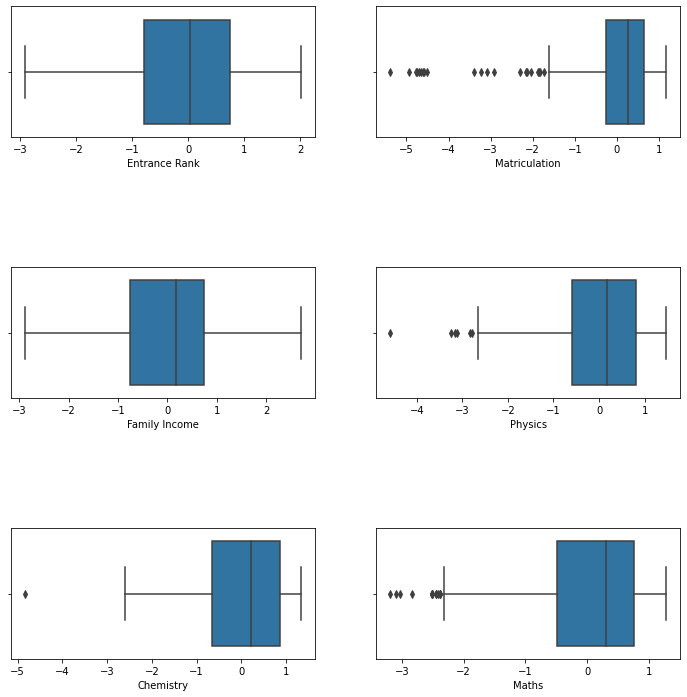

In [113]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=1)

plt.subplot(3, 2, 1)
sns.boxplot(df['Entrance Rank'])

plt.subplot(3, 2, 2)
sns.boxplot(df['Matriculation'])

plt.subplot(3, 2, 3)
sns.boxplot(df['Family Income'])

plt.subplot(3, 2, 4)
sns.boxplot(df['Physics'])

plt.subplot(3, 2, 5)
sns.boxplot(df['Chemistry'])

plt.subplot(3, 2, 6)
sns.boxplot(df['Maths'])

plt.show()

We see that outliers exist for Matriculation, Physics, Chemistry and Maths. By the code below, we find the number of outliers in each of these variables. 

In [114]:
for var in numerical_labels:
    print(var)
    q1, q3 = np.percentile(df.loc[:,var], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    above_upper = df[var] > upper_bound
    below_lower = df[var] < lower_bound
    outliers = above_upper | below_lower
    print(outliers.sum()) # number of outliers

Entrance Rank
0
Matriculation
21
Family Income
0
Physics
6
Chemistry
1
Maths
14


The common techniques to deal with outliers are

##### Deleting Observations

We delete observations having outlier values if it is due to data entry or some other errors (artificial outliers). Again it depends on the size of data set. For small sized data set's, this method is not recommended. However, the code for the same is:

In [117]:
print('Shape before dropping outliers:', df.shape)
for var in numerical_labels:    
    q1, q3 = np.percentile(df.loc[:,var], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    above_upper = df[var] > upper_bound
    below_lower = df[var] < lower_bound
    outliers = outliers | above_upper | below_lower

print('total number of outliers :', outliers.sum()) # number of outliers    

#drop outliers
#df.drop(df[outliers==True].index)

#print('Shape after dropping outliers:', df.drop(df[outliers==True].index).shape)

Shape before dropping outliers: (481, 13)
total number of outliers : 33


There are 33 rows having outliers. When they are dropped, the number of observations reduced to 448. Alternatively, we can impute the outlier values.

#### Imputing

As in the case of missing values, outliers can also be imputed by median or kNN. Imputation is normally done for

    artificial outliers, or
    outliers which arise due to some random cause which have negligible chance of repeatability and doesn't affect our analysis.

We can impute the numeric variables by median. The following code shows imputing outliers by median grouped by Seat Type

#### Segment and Analyze Separately

If the outliers present are natural outliers and are in significant number, one method is to treat them separately while building models. For example, we can split the data into two different groups and build individual models for each group.

#### Transforming and binning values

Another method to eliminate outliers is by transforming variables. Natural log of a value reduces the variation caused by extreme values. 

Binning is also a form of variable transformation. Here we assign the values in different bins determined by the class interval. These variables can then be treated as categorical variables.

#### No processing

Natural outliers which does not deviate much form the main stream data can left without any processing. We might often use this

#### Recommended method for Outliers

For our dataset, the outliers of Matriculation, Physics, Chemistry and Maths are natural outliers, and for our analysis its recommended not to do any processing.

## Categorical Variable Transformation

#### One hot encoding

Many machine learning algorithms cannot work with categorical data directly. They need to be converted to numerical representation before processing.

Each possible label for the categorical variable is converted into dummy/indicator variables. These dummy variables (of the categorical variable) are assigned values 0 except for one of them is given value 1, corresponding to the category it belongs.

Take an example of encoding the categorical variable SeatType. It is having 9 different categories or labels. So nine dummy variable dataframe is created, each having one category label as its name. Every row will be having only one 1, while all others be 0.

Then the original categorical variable in the data set is replaced with new encoded dummy/indicator variables. While replacing, one dummy variable is omitted intentionally to avoid collinearity.

explanation for why we need to drop one dummy variable out of every category
#https://stats.stackexchange.com/questions/115049/why-do-we-need-to-dummy-code-categorical-variables

#### KNN Imputation of Missing Values

kNN finds the corresponding values of its nearest k neighbors by some distance function and imputes those values. For kNN all variables should be of numeric nature. As we have one hot encoded categoric variables and converted them into numeric, we can apply kNN imputation on missing data. The code for imputing all missing values at once based on kNN is:

#### summary


    Data exploration and cleaning is a critical step where we prepare the data ready for further analysis, to be used by machine learning algorithms.
    Shape of the data set and variable types are explored.
    Numerical and Categorical variables are analysed to see the distribution of the data points.
    Numerical variables are re scaled as per the requirement of the algorithms to be employed
    Missing values are removed or imputed.
    Outliers are examined and transformed if required.
    Categorical variables are one hot encoded.